In [12]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import datetime
import random
import pandas as pd
import altair as alt
import warnings

%matplotlib notebook


# Functions

In [23]:
def get_xy(index):
    '''Gets the time and values of a given index 
    and stores them in an array of appropriate size.
    The time is the first column and the data are the
    subsequent columns'''
    
    t = dh[index].x[0]
    y = np.transpose(dh[index].y[0])
    if len(np.shape(y)) == 1:
        data = np.zeros((np.shape(t)[0],2))
        data[:,1] = y
    else:
        data = np.zeros((np.shape(t)[0],np.shape(y)[1]+1))
        data[:,1:np.shape(y)[1]+1] = y
    data[:,0] = t
    return data

In [4]:
def unix_to_utc(unix_time_array):
    '''Takes array of tick labels in unix time
    and converts them into readable utc'''
    result = [None]*(len(unix_time_array))
    for i in range(len(unix_time_array)):
        result[i] = datetime.datetime.utcfromtimestamp(unix_time_array[i]
        ).strftime('%H:%M:%S')
    print("result type:",type(result))
    return result

In [17]:
def multi_plot(data, minX_arr, maxX_arr):
    '''Creates len(minX) number of plots with 6 subplots each
    with nicely formatted datetime xlabels'''
    
    for i in range(len(minX_arr)):
        
        fig = plt.figure(figsize=(8,6.5));

        ax1 = fig.add_subplot(6,1,1);
        ax2 = fig.add_subplot(6,1,2,sharex = ax1);
        ax3 = fig.add_subplot(6,1,3,sharex = ax1);
        ax4 = fig.add_subplot(6,1,4,sharex = ax1);
        ax5 = fig.add_subplot(6,1,5,sharex = ax1);
        ax6 = fig.add_subplot(6,1,6,sharex = ax1);
  
        ax2.set_prop_cycle('color', ['r', 'g', 'b'])   

        ax1.plot(data[0][:,0], data1[:,1:]);
        ax2.plot(data[1][:,0], data2[:,1:]);
        ax3.plot(data[2][:,0], data3[:,1:]);
        ax4.plot(data[3][:,0], data4[:,1:]);
        ax5.plot(data[4][:,0], data5[:,1:]);
        ax6.plot(data[5][:,0], data6[:,1:]);

        ax1.set_ylabel('$|\mathbf{B}_{o}| (nT)$')
        ax2.set_ylabel('$\mathbf{B}_{o} (nT)$')
        ax3.set_ylabel('$n_{e}\ (cm^{-3})$')
        ax4.set_ylabel('$T_{e}$ (eV)')
        ax5.set_ylabel('$n_{i}\ (cm^{-3})$')
        ax6.set_ylabel('$T_{i}$ (eV)')

        ax6.set_xlabel('Time (August 19, 2008)')

        for j in range(len(fig.axes)-1):
            plt.setp(fig.axes[j].get_xticklabels(), visible=False)

        for j in range(len(fig.axes)):
            fig.axes[j].set_xlim(minX[i], maxX[i])

        ax6.set_xticklabels(unix_to_utc(ax6.get_xticks()));

        plt.tight_layout()
        
    return
        

In [6]:
def get_index(string_handle):
	for i in range(len(dq)):
		string = dq[i][0].decode()
		if string[4:] == string_handle:
			index = i
	return index

## Code

In [7]:
#file = 'TPLOT_save_file_THC_FGM-2008-07-14.tplot'
file = 'TPLOT_save_file_THC_FGM-ALL_EESA-2008-08-19.tplot'
f = scipy.io.readsav(file,python_dict=True)

In [8]:
dq = f['dq']
dh = dq['dh']

In [9]:
#To find names and indicies
#Remember that it's offset 1 from IDL !!

for i in range(len(dq)):
    print(i, dq[i][0])

0 b'thc_state_pos'
1 b'thc_state_vel'
2 b'thc_state_man'
3 b'thc_state_roi'
4 b'thc_state_spinras'
5 b'thc_state_spindec'
6 b'thc_state_spinalpha'
7 b'thc_state_spinbeta'
8 b'thc_state_spinper'
9 b'thc_state_spinphase'
10 b'thc_state_spinras_correction'
11 b'thc_state_spindec_correction'
12 b'thc_state_pos_gse'
13 b'thc_state_pos_gsm'
14 b'thc_state_vel_gse'
15 b'thc_state_vel_gsm'
16 b'thc_state_pos_sel'
17 b'thc_state_pos_sse'
18 b'thc_state_vel_sel'
19 b'thc_state_vel_sse'
20 b'thc_state_spinras_corrected'
21 b'thc_state_spindec_corrected'
22 b'thc_fgs_gse'
23 b'thc_fgs_gsm'
24 b'thc_fgs_dsl'
25 b'thc_fgl_gse'
26 b'thc_fgl_gsm'
27 b'thc_fgl_dsl'
28 b'thc_fgl_ssl'
29 b'thc_fgh_gse'
30 b'thc_fgh_gsm'
31 b'thc_fgh_dsl'
32 b'thc_fgh_ssl'
33 b'thc_fgs_mag'
34 b'thc_fgs_fci_flh_fce'
35 b'thc_fgl_mag'
36 b'thc_fgl_fci_flh_fce'
37 b'thc_fgh_mag'
38 b'thc_fgh_fci_flh_fce'
39 b'thc_state_pos__sm'
40 b'thc__Rad'
41 b'thc__MLT'
42 b'thc_MLAT'
43 b'thc__LSH'
44 b'thc_ILAT'
45 b'thc_state_pos_gse

In [27]:
input_string1 = 'fgh_mag'
input_string2 = 'fgh_gse'
input_string3 = 'peeb_density'
input_string4 = 'peeb_avgtemp'
input_string5 = 'peib_density'
input_string6 = 'peib_avgtemp'

index1 = get_index(input_string1)
index2 = get_index(input_string2)
index3 = get_index(input_string3)
index4 = get_index(input_string4)
index5 = get_index(input_string5)
index6 = get_index(input_string6)

data1 = get_xy(index1)
data2 = get_xy(index2)
data3 = get_xy(index3)
data4 = get_xy(index4)
data5 = get_xy(index5)
data6 = get_xy(index6)


<IPython.core.display.Javascript object>


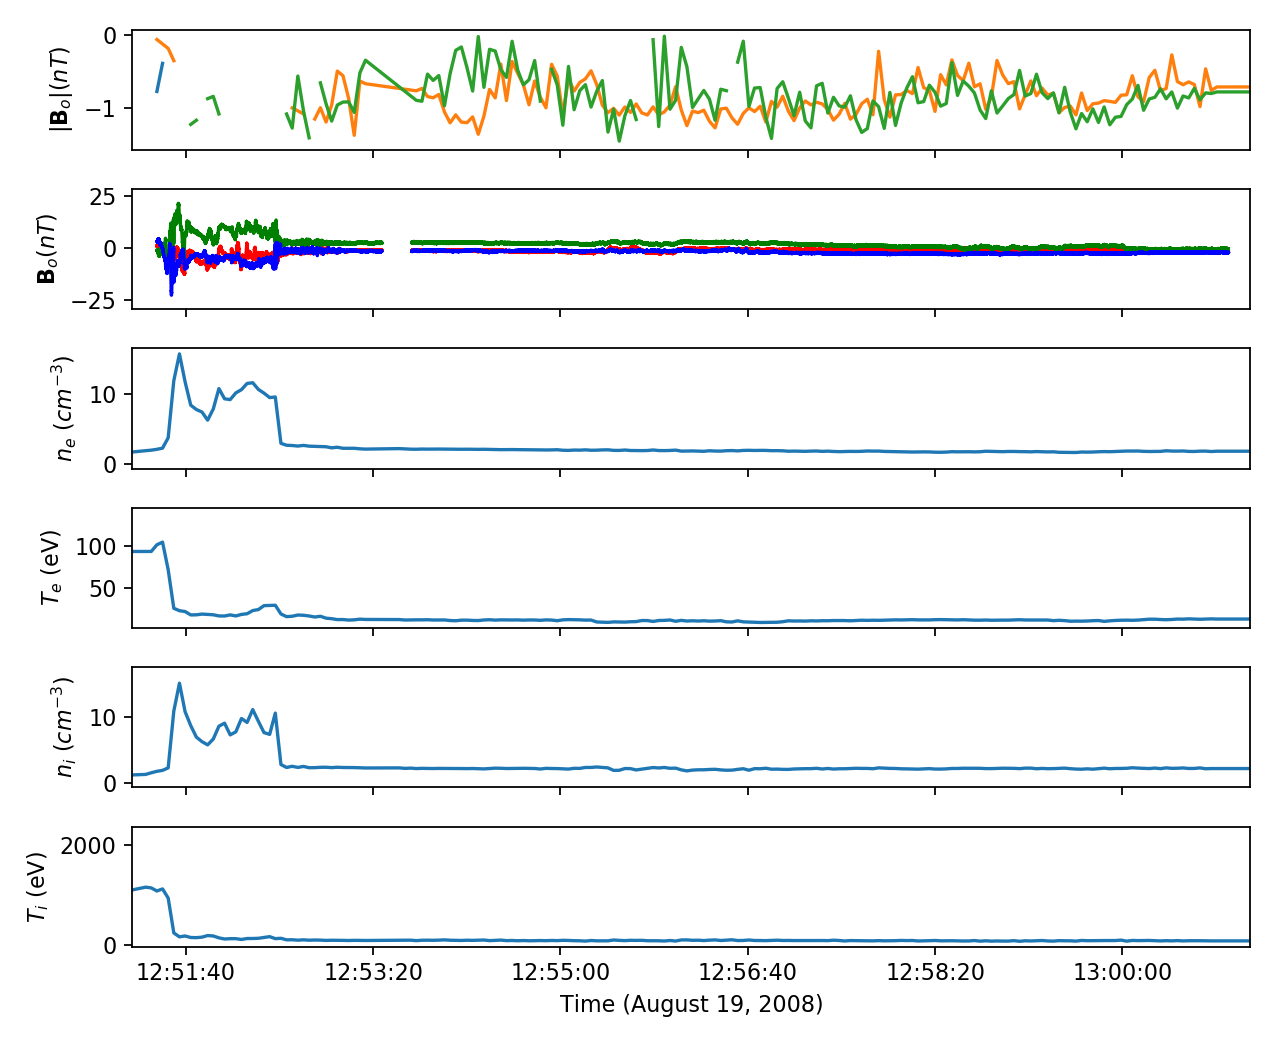

result type: <class 'list'>


<IPython.core.display.Javascript object>


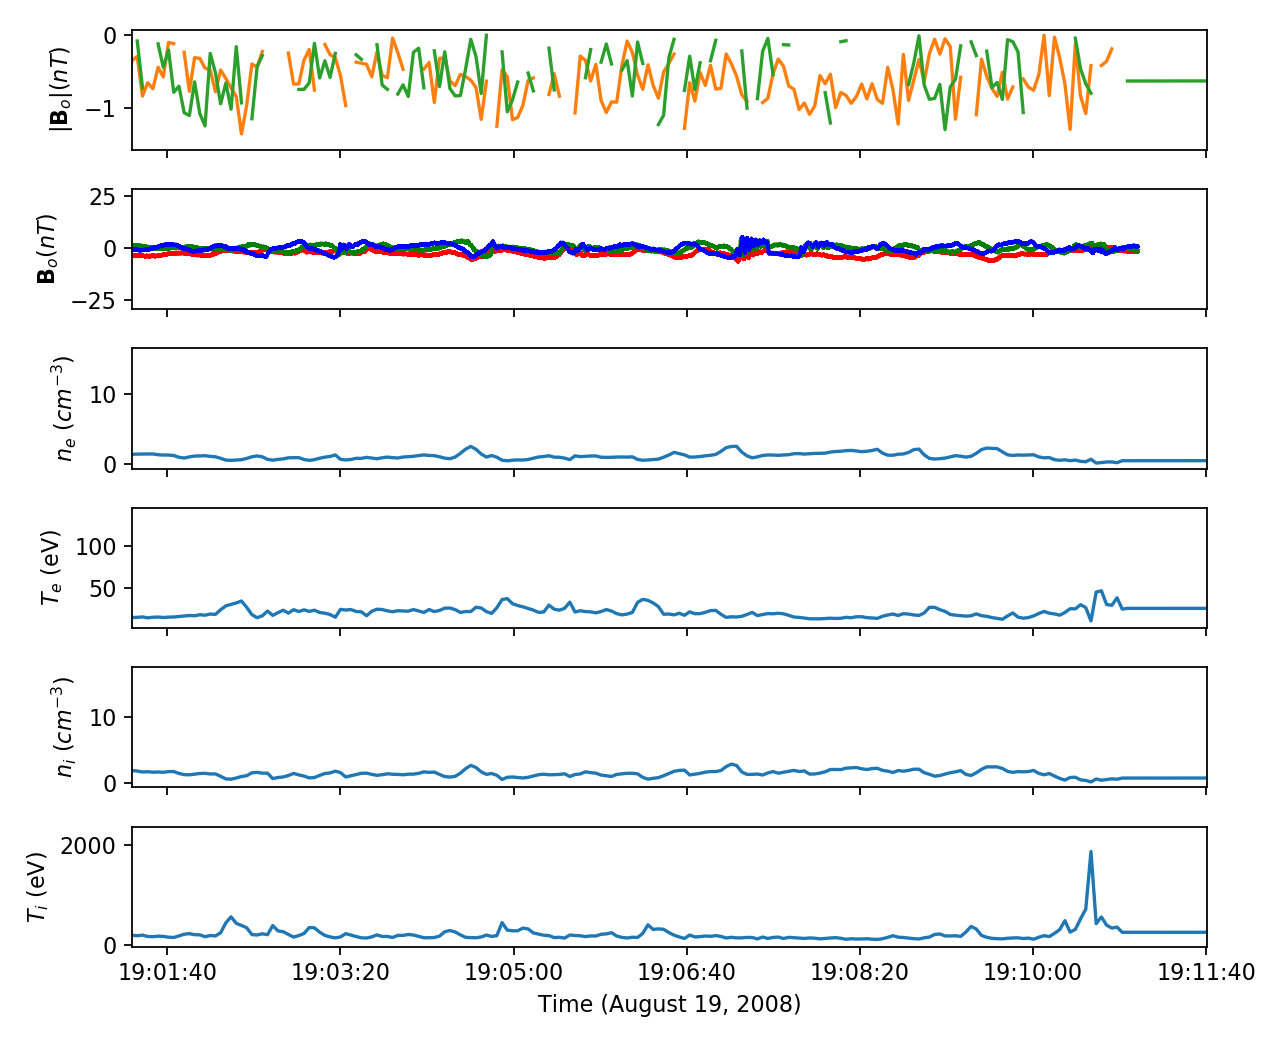

result type: <class 'list'>


<IPython.core.display.Javascript object>


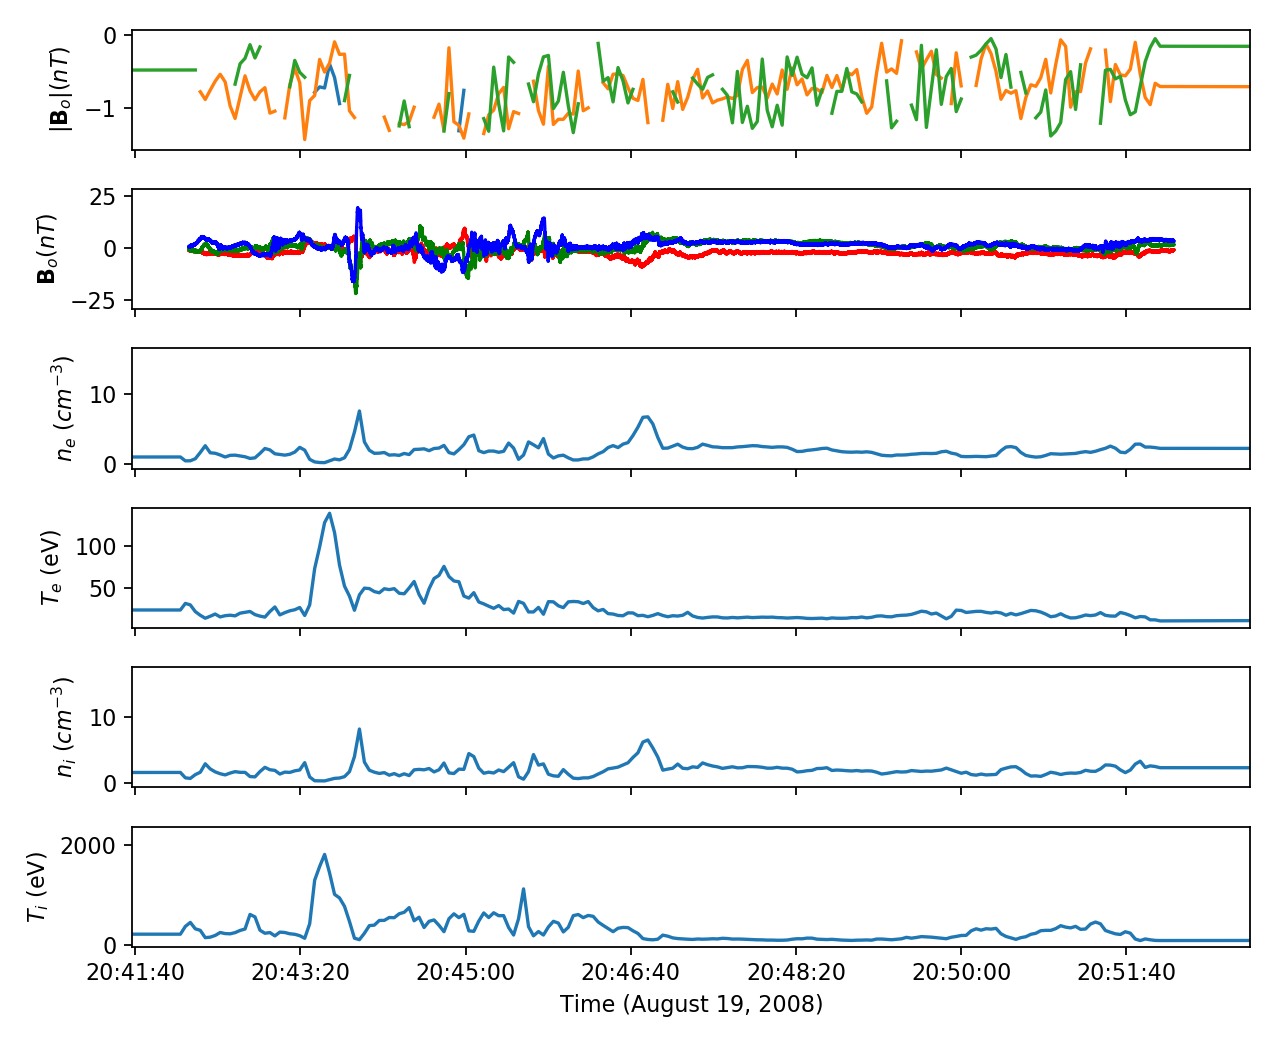

result type: <class 'list'>


<IPython.core.display.Javascript object>


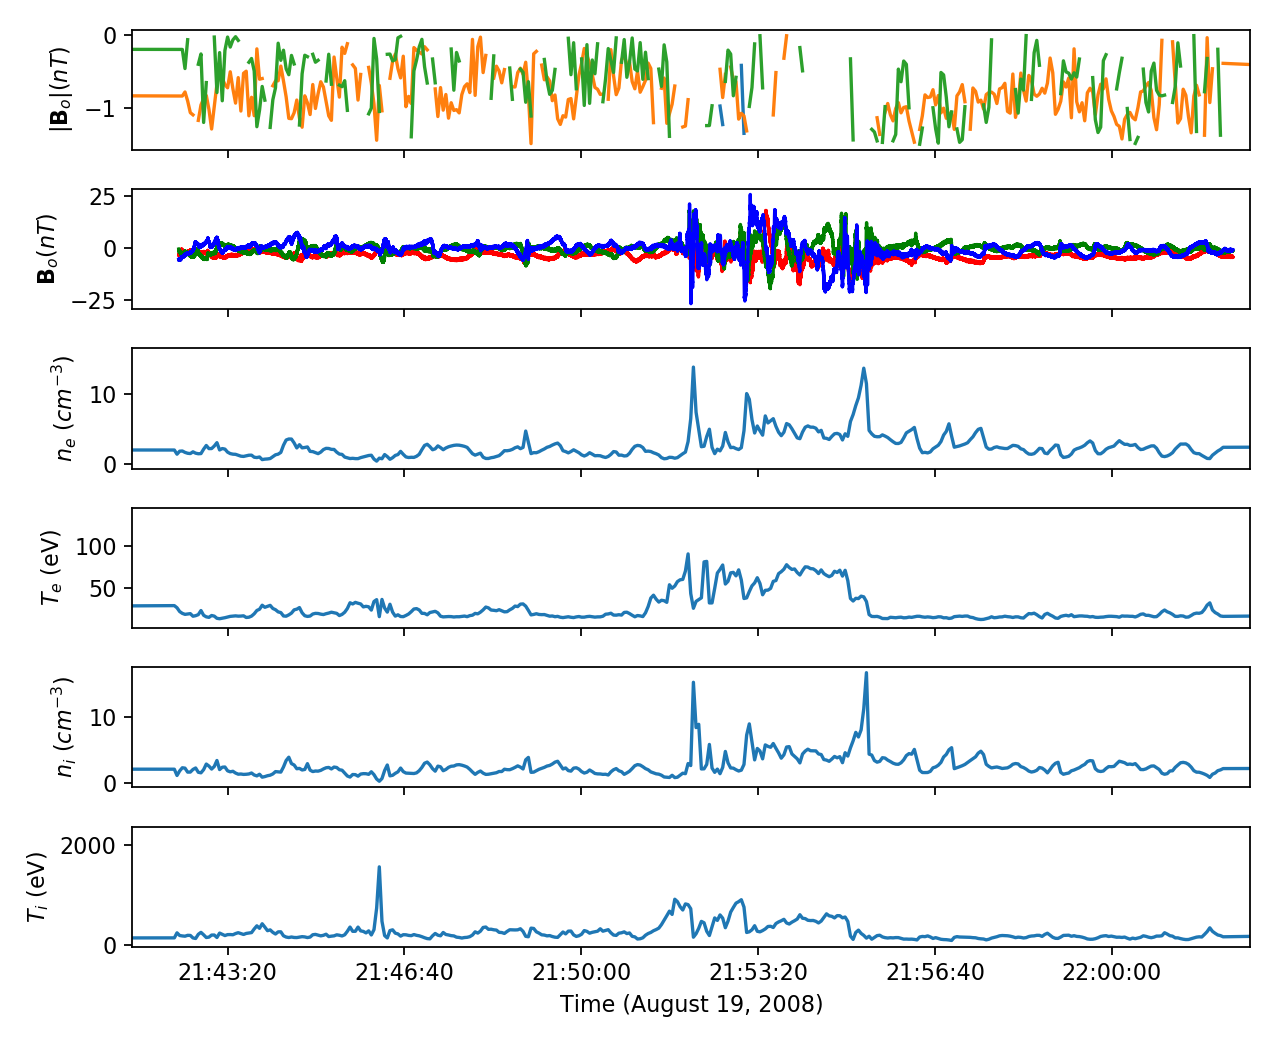

result type: <class 'list'>


<IPython.core.display.Javascript object>


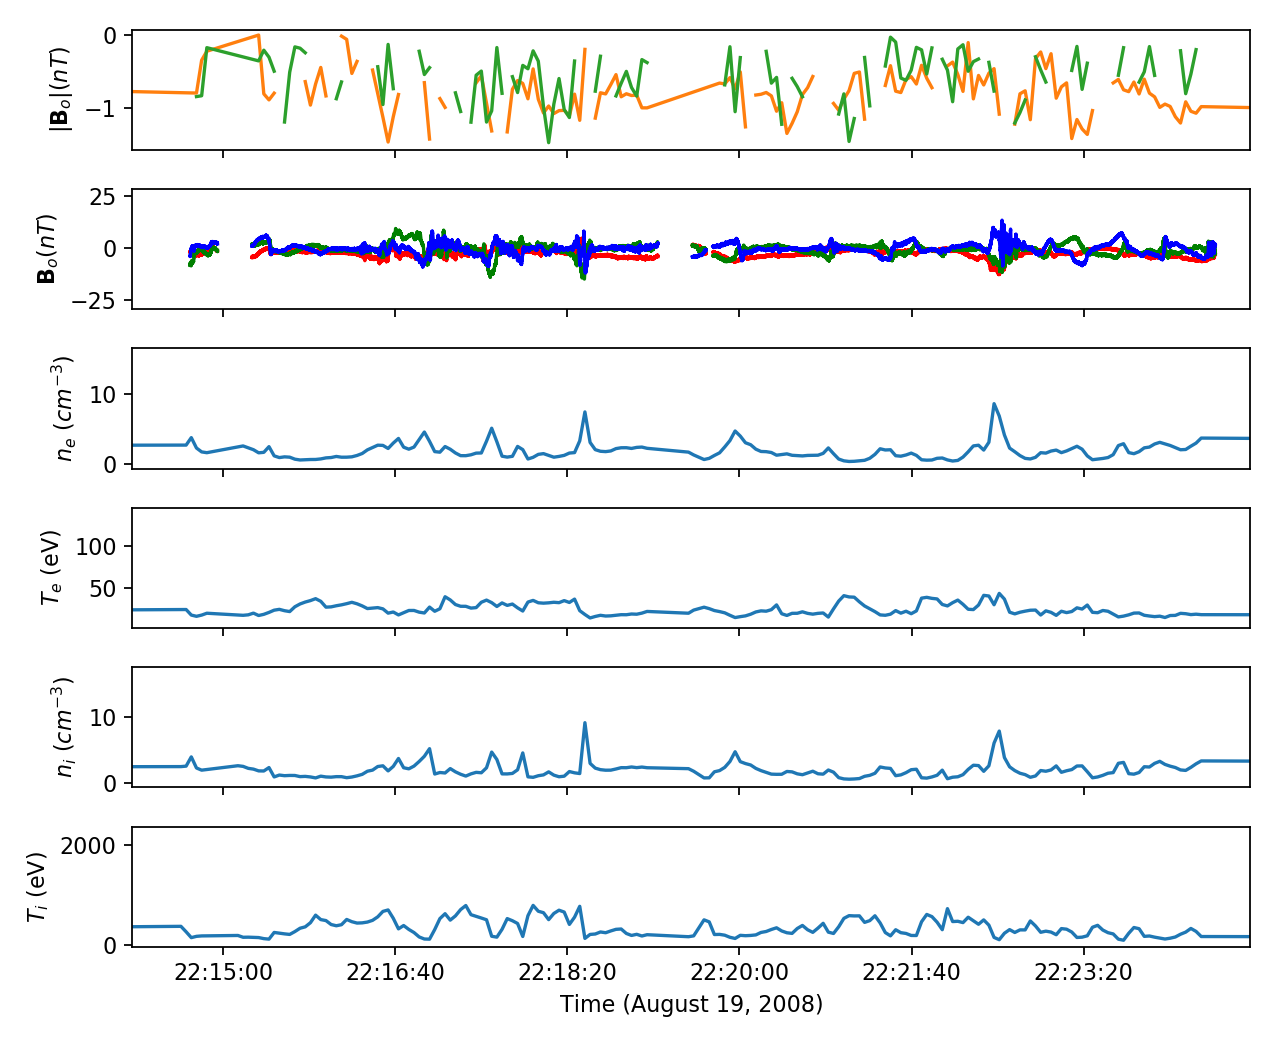

result type: <class 'list'>


<IPython.core.display.Javascript object>


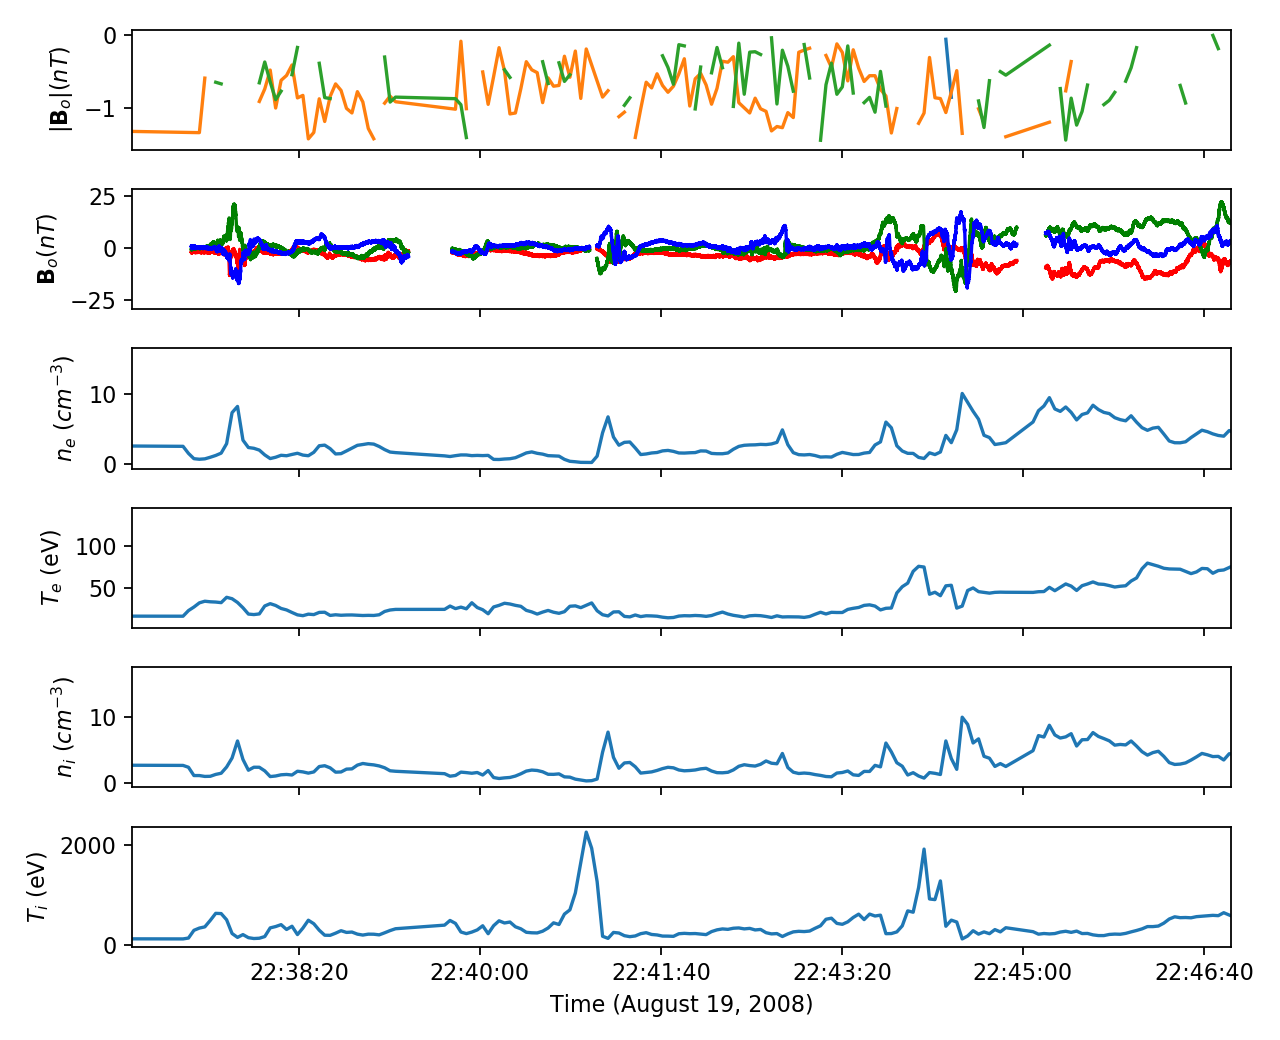

result type: <class 'list'>


In [31]:
minX = [1219150271.3906915, 1219172479.7407527, 1219178498.2215102, 1219182092.1509585, 1219184047.0718236,
       1219185407.984308] 

maxX = [1219150868.3557360, 1219173100.7796210, 1219179174.9993966, 1219183356.6322305, 1219184696.9620070,
       1219186015.0531895] 

data = [data1, data2, data3, data4, data5, data6]

multi_plot(data, minX, maxX)


In [30]:
#TEST N DIMENSIONAL K MEANS ALGORITHM
#THIS NEEDS TO BE MODIFIED TO WORK WITH AUGUST DATA

input_string1 = 'peeb_powerlaws_good'
index1 = get_index(input_string1)
data1 = get_xy(index1)

colorstr = 'rgbkc'

data = np.empty((len(data1),3))

data[:,0] = fit_A[:,1]
data[:,1] = fit_A[:,2]
data[:,2] = fit_A[:,3]

#Get rid of NaN values
indices = [ind for ind, val in enumerate(data[:,2]) if ~np.isnan(val)]
data_clean = np.empty((len(indices),3))
data_clean[:,0] = data[indices,0] 
data_clean[:,1] = data[indices,1] 
data_clean[:,2] = data[indices,2] 

k = 3
closest_cent, centroids = k_means(data_clean,k)

fig = plt.figure(figsize=(7,7))
ax = fig.gca(projection='3d')

for i in range(k):
    indices = [ind for ind, val in enumerate(closest_cent) if int(val) == i]
    #Plot points color-coded to their respective cluster
    ax.scatter(data[indices,0], data[indices,1], data[indices,2],colorstr[i], marker='o',linestyle='None')
    #Plot Centroids
    ax.scatter(centroids[i,0], centroids[i,1],centroids[i,2], colorstr[i], marker='*', s=100)

NameError: name 'fit_A' is not defined